In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Missing Completely at Random, MCAR: A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/titanic.csv')
print(df.shape)
df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
#we have Age ,Embarked and Cabin have missing NAN values
#here age and cabin have relationship among themselve
#so it is not of type Missing Completely at Random

#but Age and Embarked have no relation among themself
#so they are of type Missing Completely at Random

#Embarked -> from where the passenger have been picked up

df[df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [12]:
#Missing Data not at Random
#Systematic missing Values

#there is a relationship between the data missing and other values 

In [14]:
#here will make a new columns where we will have 1 for Null values and 0 for values in Cabin columns
df["Cabin_Null"]=np.where(df["Cabin"].isnull(),1,0)

In [24]:
#find the percentage of Nan values

df['Cabin_Null'].mean()

#77 percentage of values are Nan

0.7710437710437711

In [26]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_Null'],
      dtype='object')

In [28]:
df.groupby(['Survived'])['Cabin_Null'].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin_Null, dtype: float64

In [ ]:
#Missing at random

Men---hide their salary
Women---hide their age


# Now we will see Technique to handle missing values

1 Mean/Median/Mode Replacement

2 Random Sampling Imputation

3 Capturing Nan values with a new features

4 End of Distribution imputation

5 Arbitary Imputation

6 Frequent categories Imputation


## Mean/Meadian/Mode Imputation

In [60]:
#when we should apply this 
#it has the assumption that the data are missing completely at Random
#we solve this by replacing he Nan with he most frequent occurence of categories
# For categorical data we can use Mode
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/titanic.csv',usecols=["Age","Fare","Survived"])
print(df.shape)
df.head()

(891, 3)


,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [61]:
df.describe()

,Survived,Age,Fare
count,891.000000,714.000000,891.000000
mean,0.383838,29.699118,32.204208
std,0.486592,14.526497,49.693429
min,0.000000,0.420000,0.000000
25%,0.000000,20.125000,7.910400
50%,0.000000,28.000000,14.454200
75%,1.000000,38.000000,31.000000
max,1.000000,80.000000,512.329200


In [62]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [63]:
#df: Data
#variable: the columns name
#median: mean/median/mode

def impute_nan(df,variable,median):
    df[variable+"_"]=df[variable].fillna(median)

In [64]:
# we are using median as it is best in case of outlirs

median=df["Age"].median()
impute_nan(df,"Age",median)
df


,Survived,Age,Fare,Age_
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
...,...,...,...,...
886,0,27.0,13.0000,27.0
887,1,19.0,30.0000,19.0
888,0,NaN,23.4500,28.0
889,1,26.0,30.0000,26.0


In [65]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
Age_        0.000000
dtype: float64

In [67]:
df.describe()

,Survived,Age,Fare,Age_
count,891.000000,714.000000,891.000000,891.000000
mean,0.383838,29.699118,32.204208,29.361582
std,0.486592,14.526497,49.693429,13.019697
min,0.000000,0.420000,0.000000,0.420000
25%,0.000000,20.125000,7.910400,22.000000
50%,0.000000,28.000000,14.454200,28.000000
75%,1.000000,38.000000,31.000000,35.000000
max,1.000000,80.000000,512.329200,80.000000


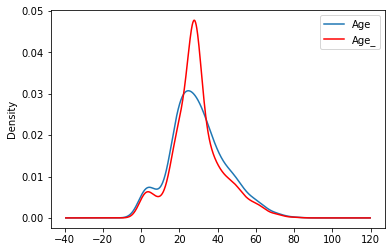

In [70]:
#kde:kernel density estimator

fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [71]:
#Advantage and Disadvantages of Mean/Median imputation

#Advantage:
#Median is robust to outliers 
#Faster to way to obtain the complete the datsets

#Disadvantage:
#Change or Distortion in the original variance
#Impacts Correlation

# Random Sample Imputation

